## IMDb Dataset

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder

In [2]:
# Read the CSV file into a DataFrame
path = 'imdb_top_1000_new.csv'  # Path to the CSV file containing the dataset
data = pd.read_csv(path)  # Load the dataset into a Pandas DataFrame

# Display the shape of the DataFrame, indicating the number of rows and columns
print("The shape of the dataset is: {} rows and {} columns".format(data.shape[0], data.shape[1]))

The shape of the dataset is: 1000 rows and 16 columns


In [4]:
# Initial feature columns for dataset
selected_columns = ['Released_Year', 'Runtime', 'Genre', 'IMDB_Rating']

# The target column for predictions
target_column = ['Series_Title']

# Extract feature array from the dataset
feature_array = data[selected_columns].values

# Extract unique genres and adjust 'Runtime'
genre_list = []

for i in feature_array:
    i[1] = i[1][:-4] # Convert runtime to integer remove 'min'
    i[1] = int(i[1])
    i[2] = i[2].split(',') # Split and clean genre names
    i[2] = [x.strip() for x in i[2]]
    genre_list.extend(i[2])


target_array = data[target_column].values

# Create unique list of genres
genre_list = list(set(genre_list))

# One-hot encoding for genres
genre_array = np.zeros((1000,21))

for i in range(feature_array.shape[0]):
    for j in range(len(feature_array[i][2])):
        k = genre_list.index(feature_array[i][2][j])
        genre_array[i, k] = 1

# Concatenate one-hot encoded genres with other features and remove original 'Genre' column
feature_array = np.concatenate((feature_array, genre_array), axis=1)

feature_array = np.delete(feature_array, 2, axis=1)

In [5]:
# Extract target values from the target_array
target_list = []

for i in target_array:
    target_list.append(i[0])

features = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Horror', 'Fantasy', 'Action', 'Romance', 'Animation', 'Music', 'Thriller',
                               'Drama', 'Comedy', 'Film-Noir', 'Family', 'History', 'Sport', 'War', 'Crime', 'Sci-Fi', 'Adventure', 'Mystery', 'Biography', 'Western', 'Musical']

In [ ]:
# Create a Decision Tree classifier with a specified max depth and entropy criterion
twenty_qs = DecisionTreeClassifier(max_depth = 20, criterion='entropy')

# Train the Decision Tree classifier with the feature and target data
twenty_qs.fit(feature_array, target_array)

# Plot the trained Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(twenty_qs, filled=True, feature_names=features, class_names=target_list)
plt.show()

In [ ]:
# Make predictions with the trained Decision Tree
predictions = twenty_qs.predict(feature_array)

# Calculate accuracy by comparing predictions with the actual target data
accuracy = accuracy_score(target_array, predictions)

# Recursive function to find the depth of the Decision Tree
def tree_depth(node_id, current_depth, model):
    if model.tree_.children_left[node_id] == -1 and model.tree_.children_right[node_id] == -1:
        # If the node is a leaf node, return the current depth
        return current_depth
    else:
        # If the node is not a leaf node, recursively calculate the depth of its children
        left_depth = tree_depth(model.tree_.children_left[node_id], current_depth + 1, model)
        right_depth = tree_depth(model.tree_.children_right[node_id], current_depth + 1, model)
        # Return the maximum depth among the children
        return max(left_depth, right_depth)

# Find the depth of the Decision Tree
depth = tree_depth(0, 0, twenty_qs)

# Display the tree depth and model accuracy
print("Tree Depth: ", depth)
print('Accuracy: ', accuracy)

In [28]:
# Make a prediction with the trained Decision Tree using a specific input
prediction_test = twenty_qs.predict([[1994, 142, 9.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

print(prediction_test)

['The Shawshank Redemption']


In [29]:
### 20 Questions Game

# Extract information from the trained Decision Tree
feature_split = twenty_qs.tree_.feature # Indices of the feature used for splitting at each node
threshold = twenty_qs.tree_.threshold # Threshold values for splitting at each node

left_child = twenty_qs.tree_.children_left # Indices for the left child of each node
right_child = twenty_qs.tree_.children_right  # Indices for the right child of each node

# Starting point for traversal
current_node = 0 # Root node
counter = 1 # Question counter

# Traverse the Decision Tree based on user input
while True:
    if feature_split[current_node] == -2:
        # If it's a leaf node, retrieve the predicted probabilities
        predicted_probs = twenty_qs.tree_.value[current_node][0]
        # print(predicted_probs)
        highest_prob_class_indices = predicted_probs.argmax(axis=0) # Find the class with the highest probability
        # print(highest_prob_class_indices)
        class_labels = twenty_qs.classes_
        
        # Display the predicted class based on the highest probability
        print("Predict: {}".format(class_labels[highest_prob_class_indices]))
        break # Exit the loop, as we've reached a leaf node

    # Ask a question based on the current node's feature and threshold
    print("Question {}: Is feature {} <= {} ?".format(counter, features[feature_split[current_node]], threshold[current_node]))

    # Get user input to determine the next direction
    reply = input()

    if reply == 'yes':
        current_node = left_child[current_node] # Move to the left child node
    elif reply == 'no':
        current_node = right_child[current_node] # Move to the right child node

    counter += 1

    # Exit the loop if the number of questions exceeds a certain limit
    if counter > 20:
        print('Could not predict.')
        break




Question 1: Is feature Released_Year <= 1998.5 ?
yes
Question 2: Is feature Runtime <= 114.5 ?
yes
Question 3: Is feature Released_Year <= 1971.5 ?
yes
Question 4: Is feature Released_Year <= 1951.5 ?
yes
Question 5: Is feature Runtime <= 96.5 ?
yes
Question 6: Is feature Runtime <= 87.5 ?
yes
Question 7: Is feature Runtime <= 73.5 ?
yes
Question 8: Is feature IMDB_Rating <= 8.000000238418579 ?
yes
Question 9: Is feature Released_Year <= 1932.5 ?
yes
Question 10: Is feature IMDB_Rating <= 7.8500001430511475 ?
yes
Predict: Frankenstein


In [3]:
# Given an entry 
target_entry = 'Frankenstein'
# Read a CSV file into a DataFrame with a specified encoding
path = 'imdb_top_1000_new.csv'  # File path to the CSV dataset
data = pd.read_csv(path)  # Read the CSV using Latin-1 encoding

df = data
selected_columns = ['Series_Title','Director']
# Extract only the desired columns
df_selected = df[selected_columns]

# Find the corresponding entry in column 'name' in the same row
corresponding_y = df_selected.loc[df_selected['Series_Title'] == target_entry, 'Director'].iloc[0]

print("The corresponding entry in 'name' for '{}' in 'Series_Title' is: {}".format(target_entry, corresponding_y))


The corresponding entry in 'name' for 'Frankenstein' in 'Series_Title' is: James Whale


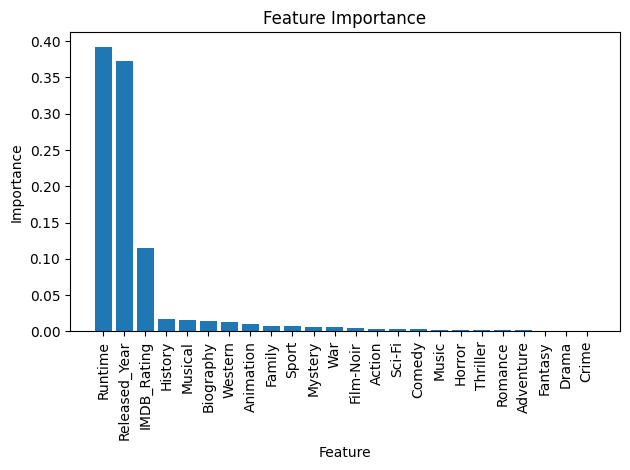

In [30]:
# Feature importance bar chart
importances = twenty_qs.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort by importance

plt.figure()
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


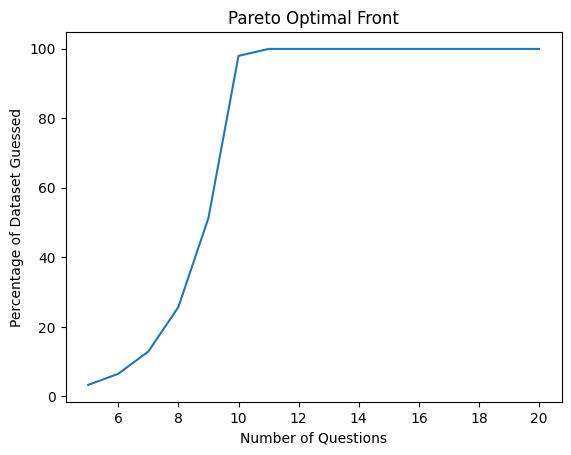

In [5]:
x = [5, 6, 7, 8, 9, 10, 11, 12, 13, 20]  # x-coordinates
y = [3.3, 6.5, 12.9, 25.7, 51.3, 97.9, 99.9, 99.9, 99.9, 99.9]  # y-coordinates

# Create a line plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('Number of Questions')
plt.ylabel('Percentage of Dataset Guessed')
plt.title('Pareto Optimal Front')

# Show the plot
plt.show()

## Wikipedia Notable People Dataset

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder

In [3]:
# Read a CSV file into a DataFrame with a specified encoding
path = 'Wikipedia.csv'
data = pd.read_csv(path,encoding='latin-1')

# Print the shape of the DataFrame (number of rows and columns)
print("The shape of the dataset is: {} rows and {} columns".format(data.shape[0], data.shape[1]))

The shape of the dataset is: 2291817 rows and 49 columns


In [4]:
df = data
df.head()

,wikidata_code,birth,death,updated_death_date,approx_birth,approx_death,birth_min,birth_max,death_min,death_max,...,area2_of_rattachment,list_wikipedia_editions,un_region,group_wikipedia_editions,bplo1,dplo1,bpla1,dpla1,pantheon_1,level3_all_occ
0,Q1000002,1932.0,1990.0,NaN,NaN,NaN,1932.0,1932.0,1990.0,1990.0,...,Missing,dewiki,Europe,grB,11.833333,12.420000,53.416668,54.381390,0,D:_playwright_journalist_writer_screenwriter_P...
1,Q1000005,1860.0,1927.0,NaN,NaN,NaN,1860.0,1860.0,1927.0,1927.0,...,Missing,dewiki|cswiki|enwiki|eowiki|itwiki|kkwiki|rowi...,Europe,grA,12.929798,14.421389,49.440605,50.087502,0,D:_writer_journalist_P:_naturalist_writer_jour...
2,Q1000006,1971.0,NaN,NaN,NaN,NaN,1971.0,1971.0,NaN,NaN,...,Missing,dewiki,Europe,grB,9.191944,NaN,48.897499,NaN,0,D:_film_screenwriter_film_P:_regisseur_autor_f...
3,Q1000015,1983.0,NaN,NaN,NaN,NaN,1983.0,1983.0,NaN,NaN,...,Missing,dewiki,Europe,grB,13.383333,NaN,52.516666,NaN,0,D:_actor_P:_schauspiel_German
4,Q1000023,1912.0,1977.0,NaN,NaN,NaN,1912.0,1912.0,1977.0,1977.0,...,Missing,dewiki,Europe,grB,13.350000,8.400000,52.433300,49.016666,0,D:_judge_jurist_P:_ richter_verfassung_German


In [5]:
df.columns
print(df['name'])

0                         Claus_Hammel
1             Karel_MatÄj_Äapek-Chod
2                    Florian_Eichinger
3                         Florian_Jahr
4          Wiltraut_Rupp-von_BrÃ¼nneck
                      ...             
2291812                  Mitja_MeÅ¾nar
2291813                    Martin_Cikl
2291814       Vincent_Descombes_Sevoie
2291815                JosÃ©_Massaroli
2291816                  Seraina_Boner
Name: name, Length: 2291817, dtype: object


In [6]:
import pandas as pd

selected_columns = ['wikidata_code','birth', 'death', 'gender', 'level1_main_occ', 'un_subregion','citizenship_1_b']

# Extract only the desired columns
df_selected = df[selected_columns]

# Drop rows with NaN values in any of the selected columns
df_clean = df_selected.dropna()

# Display the cleaned DataFrame
print(df_clean)
df_clean = df_clean.head(10000)

        wikidata_code   birth   death  gender    level1_main_occ   
0            Q1000002  1932.0  1990.0    Male            Culture  \
1            Q1000005  1860.0  1927.0    Male            Culture   
4            Q1000023  1912.0  1977.0  Female         Leadership   
5            Q1000026  1928.0  2016.0    Male            Culture   
6            Q1000034  1818.0  1894.0    Male  Discovery/Science   
...               ...     ...     ...     ...                ...   
2291800       Q999960  1935.0  2020.0    Male            Culture   
2291802       Q999968  1947.0  2016.0    Male            Culture   
2291804       Q999971  1923.0  1996.0    Male         Leadership   
2291805       Q999975  1929.0  2008.0    Male  Discovery/Science   
2291808       Q999985  1880.0  1942.0    Male  Discovery/Science   

             un_subregion citizenship_1_b  
0          Western Europe         Germany  
1          Western Europe  Czech_Republic  
4          Western Europe         Germany  
5      

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 18094
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   wikidata_code    10000 non-null  object 
 1   birth            10000 non-null  float64
 2   death            10000 non-null  float64
 3   gender           10000 non-null  object 
 4   level1_main_occ  10000 non-null  object 
 5   un_subregion     10000 non-null  object 
 6   citizenship_1_b  10000 non-null  object 
dtypes: float64(2), object(5)
memory usage: 625.0+ KB


In [9]:
import pandas as pd

df = df_clean

# Columns to keep as-is (without encoding)
columns_to_keep = ['wikidata_code', 'birth', 'death']

# Columns to one-hot encode
columns_to_encode = ['gender', 'level1_main_occ', 'un_subregion', 'citizenship_1_b']

# Apply one-hot encoding to the specified columns
df_encoded = pd.get_dummies(df[columns_to_encode])

# Combine the original data with the encoded features
df_final = pd.concat([df[columns_to_keep], df_encoded], axis=1)

# Display the final DataFrame
print(df_final)


      wikidata_code   birth   death  gender_Female  gender_Male  gender_Other   
0          Q1000002  1932.0  1990.0          False         True         False  \
1          Q1000005  1860.0  1927.0          False         True         False   
4          Q1000023  1912.0  1977.0           True        False         False   
5          Q1000026  1928.0  2016.0          False         True         False   
6          Q1000034  1818.0  1894.0          False         True         False   
...             ...     ...     ...            ...          ...           ...   
18086     Q10336030  1917.0  2012.0          False         True         False   
18088     Q10336046  1913.0  1986.0          False         True         False   
18089     Q10336047  1939.0  1975.0          False         True         False   
18092     Q10336062  1912.0  1994.0          False         True         False   
18094     Q10336065  1910.0  1996.0          False         True         False   

       level1_main_occ_Cult

In [10]:
df.columns
col = list(df_final.columns)

In [11]:
selected = col[1:]
print(selected)

['birth', 'death', 'gender_Female', 'gender_Male', 'gender_Other', 'level1_main_occ_Culture', 'level1_main_occ_Discovery/Science', 'level1_main_occ_Leadership', 'level1_main_occ_Missing', 'level1_main_occ_Other', 'level1_main_occ_Sports/Games', 'un_subregion_Caribbean', 'un_subregion_Central Africa', 'un_subregion_Central America', 'un_subregion_East Africa', 'un_subregion_Eastern Asia', 'un_subregion_Eastern Europe', 'un_subregion_North Africa', 'un_subregion_Northern America', 'un_subregion_Northern Europe', 'un_subregion_Oceania Western World', 'un_subregion_Oceania not Aus Nze', 'un_subregion_South America', 'un_subregion_South Asia incl. Indian Peninsula', 'un_subregion_SouthEast Asia', 'un_subregion_Southern Africa', 'un_subregion_Southern Europe', 'un_subregion_West Africa', 'un_subregion_Western Asia (Middle East Caucasus)', 'un_subregion_Western Europe', 'citizenship_1_b_Albania', 'citizenship_1_b_Angola', 'citizenship_1_b_Argentina', 'citizenship_1_b_Australia', 'citizenship_

In [12]:
# Get the feature values from the selected columns
feature_array = df_final[selected].values

In [13]:
df_final.columns

Index(['wikidata_code', 'birth', 'death', 'gender_Female', 'gender_Male',
       'gender_Other', 'level1_main_occ_Culture',
       'level1_main_occ_Discovery/Science', 'level1_main_occ_Leadership',
       'level1_main_occ_Missing',
       ...
       'citizenship_1_b_Taiwan', 'citizenship_1_b_Turkey',
       'citizenship_1_b_Tuvalu', 'citizenship_1_b_US',
       'citizenship_1_b_Uganda', 'citizenship_1_b_United_Arab_Emirates',
       'citizenship_1_b_United_Kingdom', 'citizenship_1_b_Uruguay',
       'citizenship_1_b_Vietnam', 'citizenship_1_b_Yugoslavia'],
      dtype='object', length=127)

In [14]:
# Extract target values from the specified column
selected = ['wikidata_code']
target_array = df[selected].values

In [15]:
# Create a list from the target array
target_list = []

for i in target_array:
    target_list.append(i[0])

# Assign feature names, excluding the first item
features = col[1:]
print(target_list)

['Q1000002', 'Q1000005', 'Q1000023', 'Q1000026', 'Q1000034', 'Q1000044', 'Q1000045', 'Q1000048', 'Q100005', 'Q1000051', 'Q1000070', 'Q1000079', 'Q1000085', 'Q1000154', 'Q1000180', 'Q1000193', 'Q1000194', 'Q1000203', 'Q1000231', 'Q1000235', 'Q1000238', 'Q1000242', 'Q1000269', 'Q100028', 'Q1000282', 'Q100029', 'Q1000292', 'Q100031', 'Q1000314', 'Q1000323', 'Q1000337', 'Q100035', 'Q1000366', 'Q1000379', 'Q1000382', 'Q1000385', 'Q1000401', 'Q1000405', 'Q1000421', 'Q1000439', 'Q1000471', 'Q1000491', 'Q1000498', 'Q1000502', 'Q1000507', 'Q1000528', 'Q1000534', 'Q1000539', 'Q1000549', 'Q1000556', 'Q1000581', 'Q1000593', 'Q1000596', 'Q1000600', 'Q1000601', 'Q1000605', 'Q1000619', 'Q1000637', 'Q1000680', 'Q1000687', 'Q1000696', 'Q1000698', 'Q10007', 'Q1000711', 'Q1000714', 'Q1000716', 'Q1000729', 'Q100073', 'Q1000731', 'Q1000734', 'Q1000761', 'Q1000788', 'Q1000799', 'Q1000805', 'Q1000807', 'Q1000841', 'Q1000862', 'Q1000874', 'Q1000896', 'Q1000920', 'Q1000929', 'Q1000934', 'Q1000935', 'Q1000937',

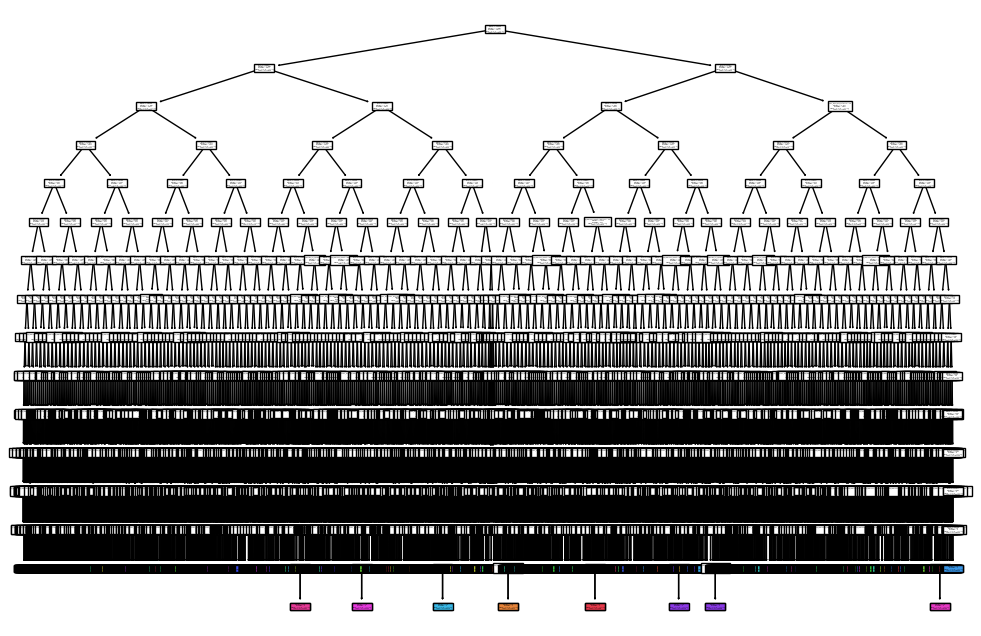

In [16]:
# Initialize and fit the Decision Tree classifier
twenty_qs = DecisionTreeClassifier(max_depth = 20, criterion='entropy')

twenty_qs.fit(feature_array, target_array)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(twenty_qs, filled=True, feature_names=features, class_names=target_list)
plt.show()

In [17]:
# Get predictions and calculate accuracy
predictions = twenty_qs.predict(feature_array)
accuracy = accuracy_score(target_array, predictions)

# Function to find the depth of a tree node recursively
def tree_depth(node_id, current_depth, model):
    if model.tree_.children_left[node_id] == -1 and model.tree_.children_right[node_id] == -1:
        # If the node is a leaf node, return the current depth
        return current_depth
    else:
        # If the node is not a leaf node, recursively calculate the depth of its children
        left_depth = tree_depth(model.tree_.children_left[node_id], current_depth + 1, model)
        right_depth = tree_depth(model.tree_.children_right[node_id], current_depth + 1, model)
        # Return the maximum depth among the children
        return max(left_depth, right_depth)

# Calculate the tree's maximum depth
depth = tree_depth(0, 0, twenty_qs)

# Display the depth of the tree and accuracy of predictions
print("Tree Depth: ", depth)
print('Accuracy: ', accuracy)

Tree Depth:  15
Accuracy:  0.9288


In [18]:
### 20 Questions Game

# Information about the Decision Tree structure
feature_split = twenty_qs.tree_.feature
threshold = twenty_qs.tree_.threshold

left_child = twenty_qs.tree_.children_left
right_child = twenty_qs.tree_.children_right

# Initialize traversal
current_node = 0
counter = 1

while True:
    if feature_split[current_node] == -2: # If it's a leaf node
        predicted_probs = twenty_qs.tree_.value[current_node][0]
        # print(predicted_probs)
        highest_prob_class_indices = predicted_probs.argmax(axis=0) # Get the class with the highest probability
        # print(highest_prob_class_indices)
        class_labels = twenty_qs.classes_
        print("Predict: {}".format(class_labels[highest_prob_class_indices]))
        break # Stop the loop since we reached a leaf node

    # Ask a question about the current node's feature and threshold
    print("Question {}: Is feature {} <= {} ?".format(counter, features[feature_split[current_node]], threshold[current_node]))

    # Determine the direction based on the user's response
    reply = input()

    if reply == 'yes':
        current_node = left_child[current_node] # Go to the left child
    elif reply == 'no':
        current_node = right_child[current_node] # Go to the right child

    counter += 1

    # Stop if more than 20 questions have been asked
    if counter > 20:
        print('Could not predict.')
        break

Question 1: Is feature death <= 1952.5 ?
yes
Question 2: Is feature birth <= 1828.5 ?
no
Question 3: Is feature birth <= 1859.5 ?
yes
Question 4: Is feature death <= 1912.5 ?
no
Question 5: Is feature death <= 1923.5 ?
yes
Question 6: Is feature birth <= 1844.5 ?
yes
Question 7: Is feature death <= 1917.5 ?
yes
Question 8: Is feature birth <= 1837.5 ?
no
Question 9: Is feature birth <= 1840.5 ?
no
Question 10: Is feature level1_main_occ_Leadership <= 0.5 ?
yes
Question 11: Is feature un_subregion_Western Europe <= 0.5 ?
yes
Question 12: Is feature un_subregion_South America <= 0.5 ?
no
Question 13: Is feature gender_Male <= 0.5 ?
yes
Predict: Q10327041


In [4]:
# Given an entry 
target_entry = 'Q10327041'
# Read a CSV file into a DataFrame with a specified encoding
path = 'Wikipedia.csv'  # File path to the CSV dataset
data = pd.read_csv(path, encoding='latin-1')  # Read the CSV using Latin-1 encoding

df = data
selected_columns = ['name','wikidata_code','birth', 'death', 'gender', 'level1_main_occ', 'un_subregion','citizenship_1_b']

# Extract only the desired columns
df_selected = df[selected_columns]

# Drop rows with NaN values in any of the selected columns
df_clean = df_selected.dropna()
df_clean = df_clean.head(10000)

# Find the corresponding entry in column 'name' in the same row
corresponding_y = df_clean.loc[df_clean['wikidata_code'] == target_entry, 'name'].iloc[0]

print("The corresponding entry in 'name' for '{}' in 'wikidata_code' is: {}".format(target_entry, corresponding_y))

The corresponding entry in 'name' for 'Q10327041' in 'wikidata_code' is: Mary_Parker_Dascomb


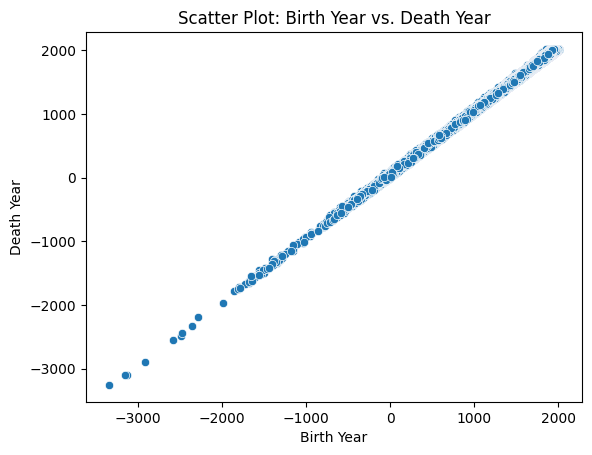

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Wikipedia.csv', encoding='latin-1')

# Drop rows with missing 'birth' or 'death' to ensure clean data
df_clean = df.dropna(subset=['birth', 'death'])

# Scatter plot of birth year vs. death year
sns.scatterplot(x=df_clean['birth'], y=df_clean['death'])
plt.xlabel('Birth Year')
plt.ylabel('Death Year')
plt.title('Scatter Plot: Birth Year vs. Death Year')
plt.savefig('birth_vs_death.png')  # Save the plot to a file
plt.show()  # Display the plot


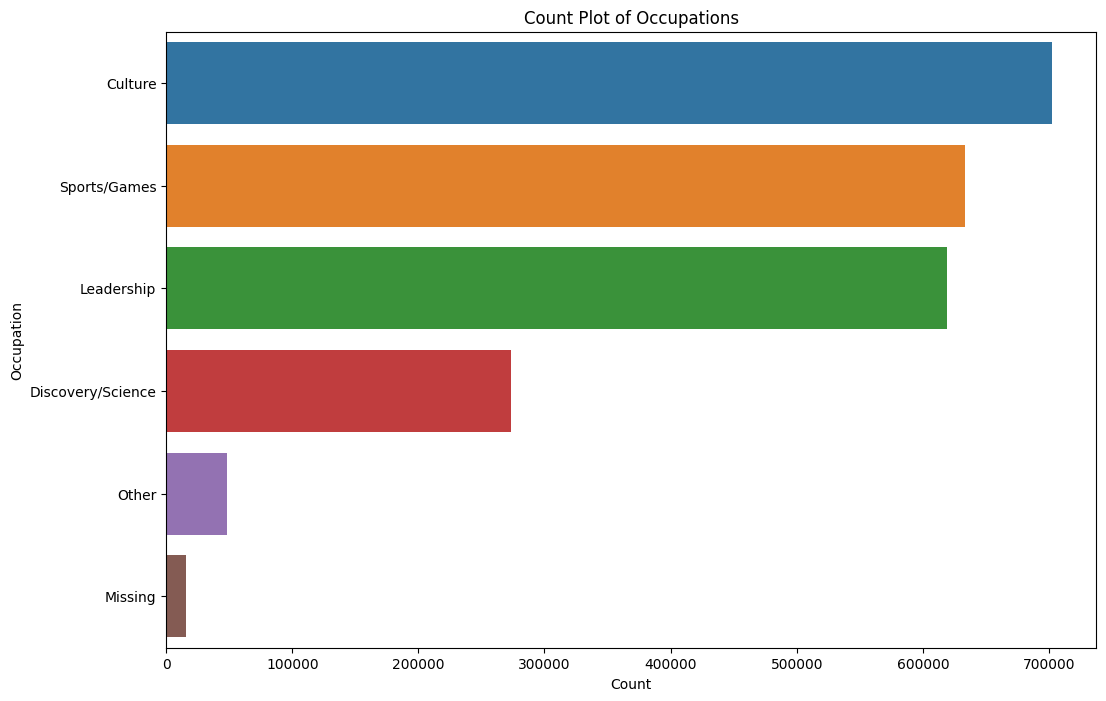

In [12]:
# Clean the data by dropping rows with NaN in the occupation column
df_clean = df.dropna(subset=['level1_main_occ'])

# Create a count plot for occupations
plt.figure(figsize=(12, 8))  # Optional: Adjust the figure size
sns.countplot(y=df_clean['level1_main_occ'], order=df_clean['level1_main_occ'].value_counts().index)  # 'y' for horizontal plot
plt.title("Count Plot of Occupations")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.savefig('occupation_count_plot.png')  # Save the plot to an image file
plt.show()  # Display the plot

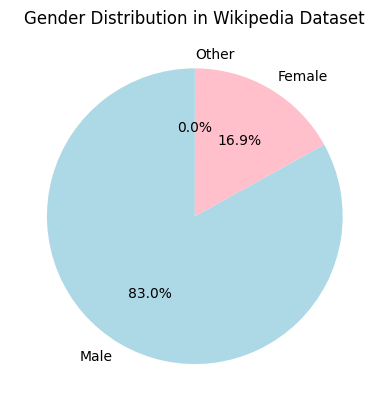

In [13]:
gender_counts = df_clean['gender'].value_counts()  # Modify with appropriate column name
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])  # Adjust colors if needed
plt.title('Gender Distribution in Wikipedia Dataset')
plt.ylabel('')  # Optional: remove the default y-axis label for aesthetics
plt.show()